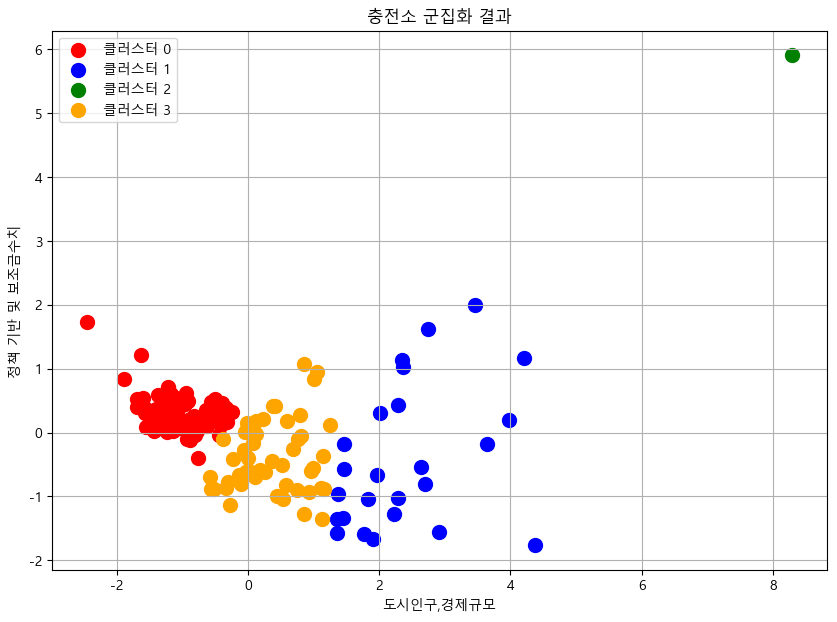

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import folium

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

charging = pd.read_csv("../data/processed/ev_charging_count.csv")
population = pd.read_csv("../data/raw/Region_population.csv")
region = pd.read_csv("../data/raw/Region.csv")
subsidy = pd.read_csv("../data/raw/ev_subsidy.csv")

charging.columns = ['시군구', '급속충전기', '완속충전기']
charging['충전소총합'] = charging['급속충전기'] + charging['완속충전기']

population = population[['행정구역', '총인구수']]
population.columns = ['시군구', '총인구수']

region = region[['행정구역', '소득평균']]
region.columns = ['시군구', '소득평균']

subsidy = subsidy[['행정구역', '만원']]
subsidy.columns = ['시군구', '보조금/승용(만원)']

for df in [charging, population, region, subsidy]:
    df['시군구'] = df['시군구'].str.strip()

merged = population.merge(charging, on='시군구', how='left')\
                   .merge(region, on='시군구', how='left')\
                   .merge(subsidy, on='시군구', how='left')
merged.fillna(0, inplace=True)

#PCA 이용
features = ['충전소총합', '총인구수', '소득평균', '보조금/승용(만원)']
scaler = StandardScaler()
scaled = scaler.fit_transform(merged[features])

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled)
merged['PCA1'] = pca_result[:, 0]
merged['PCA2'] = pca_result[:, 1]

# kmeans 군집화
kmeans = KMeans(n_clusters=4, random_state=42)
merged['클러스터'] = kmeans.fit_predict(pca_result)

plt.figure(figsize=(10, 7))

colors = ['red', 'blue', 'green', 'orange']  

for cluster_id in range(4):
    subset = merged[merged['클러스터'] == cluster_id]
    plt.scatter(
        subset['PCA1'], subset['PCA2'],
        s=100,
        label=f'클러스터 {cluster_id}',
        color=colors[cluster_id]
    )

plt.title("충전소 군집화 결과")
plt.xlabel("도시인구,경제규모")
plt.ylabel("정책 기반 및 보조금수치")
plt.grid(True)
plt.legend()
plt.show()


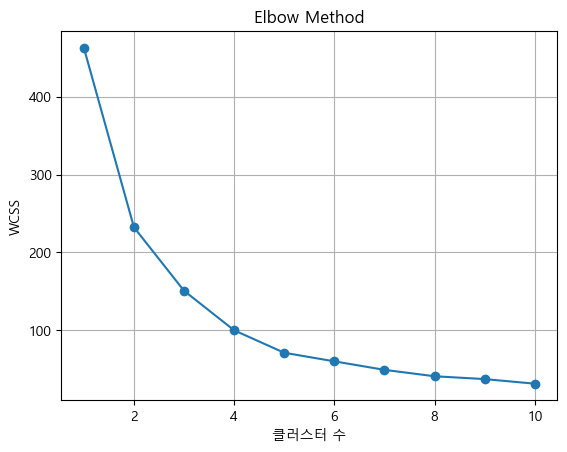

In [10]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_result)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("클러스터 수")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.grid(True)
plt.show()

In [11]:
from sklearn.metrics import silhouette_score

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_result)
    score = silhouette_score(pca_result, labels)
    print(f"K={k}, 실루엣 점수={score:.3f}")

K=2, 실루엣 점수=0.547
K=3, 실루엣 점수=0.549
K=4, 실루엣 점수=0.474
K=5, 실루엣 점수=0.476
K=6, 실루엣 점수=0.416
K=7, 실루엣 점수=0.388
K=8, 실루엣 점수=0.407
K=9, 실루엣 점수=0.350
K=10, 실루엣 점수=0.351


In [12]:
print(" 클러스터별 시군구 이름 리스트:\n")
for cluster_id in sorted(merged['클러스터'].unique()):
    시군구들 = merged[merged['클러스터'] == cluster_id]['시군구'].tolist()
    시군구들_clean = [str(name).strip() for name in 시군구들 if str(name).strip()]
    print(f"\n 클러스터 {cluster_id} ({len(시군구들_clean)}개 지역):")
    print(', '.join(시군구들_clean))

 클러스터별 시군구 이름 리스트:


 클러스터 0 (81개 지역):
충청북도 제천시, 충청북도 보은군, 충청북도 옥천군, 충청북도 영동군, 충청북도 증평군, 충청북도 진천군, 충청북도 괴산군, 충청북도 음성군, 충청북도 단양군, 충청남도 공주시, 충청남도 보령시, 충청남도 서산시, 충청남도 논산시, 충청남도 계룡시, 충청남도 당진시, 충청남도 금산군, 충청남도 부여군, 충청남도 서천군, 충청남도 청양군, 충청남도 홍성군, 충청남도 예산군, 충청남도 태안군, 전라북도 정읍시, 전라북도 남원시, 전라북도 김제시, 전라북도 완주군, 전라북도 진안군, 전라북도 무주군, 전라북도 장수군, 전라북도 임실군, 전라북도 순창군, 전라북도 고창군, 전라북도 부안군, 전라남도 나주시, 전라남도 담양군, 전라남도 곡성군, 전라남도 구례군, 전라남도 고흥군, 전라남도 보성군, 전라남도 화순군, 전라남도 장흥군, 전라남도 강진군, 전라남도 해남군, 전라남도 영암군, 전라남도 무안군, 전라남도 함평군, 전라남도 영광군, 전라남도 장성군, 전라남도 완도군, 전라남도 진도군, 전라남도 신안군, 경상북도 김천시, 경상북도 안동시, 경상북도 영주시, 경상북도 영천시, 경상북도 상주시, 경상북도 문경시, 경상북도 의성군, 경상북도 청송군, 경상북도 영양군, 경상북도 영덕군, 경상북도 청도군, 경상북도 고령군, 경상북도 성주군, 경상북도 칠곡군, 경상북도 예천군, 경상북도 봉화군, 경상북도 울진군, 경상북도 울릉군, 경상남도 통영시, 경상남도 밀양시, 경상남도 의령군, 경상남도 함안군, 경상남도 창녕군, 경상남도 고성군, 경상남도 남해군, 경상남도 하동군, 경상남도 산청군, 경상남도 함양군, 경상남도 거창군, 경상남도 합천군

 클러스터 1 (25개 지역):
부산광역시, 대구광역시, 인천광역시, 광주광역시, 대전광역시, 울산광역시, 세종특별자치시, 강원도 원주시, 경상남도 김해시, 제주도, 경기도 고양시, 경기도 과천시, 경기도 광주시, 경기도 김포시, 경기도 남양주시, 경기도 부천시, 경기도

In [13]:

compare_columns = ['충전소총합', '총인구수', '소득평균', '보조금/승용(만원)']
cluster_summary = merged.groupby('클러스터')[compare_columns].mean().round(1)

print("클러스터별 평균값 비교표:\n")
print(cluster_summary.to_string(col_space=12))


클러스터별 평균값 비교표:

                    충전소총합         총인구수         소득평균   보조금/승용(만원)
클러스터                                                            
0                    18.0      60179.6   23577774.2       1225.3
1                   186.2     418130.4   31390026.5        852.7
2                  1468.0     373274.0   43714404.2        640.0
3                    49.5     183621.5   26214269.4        992.6


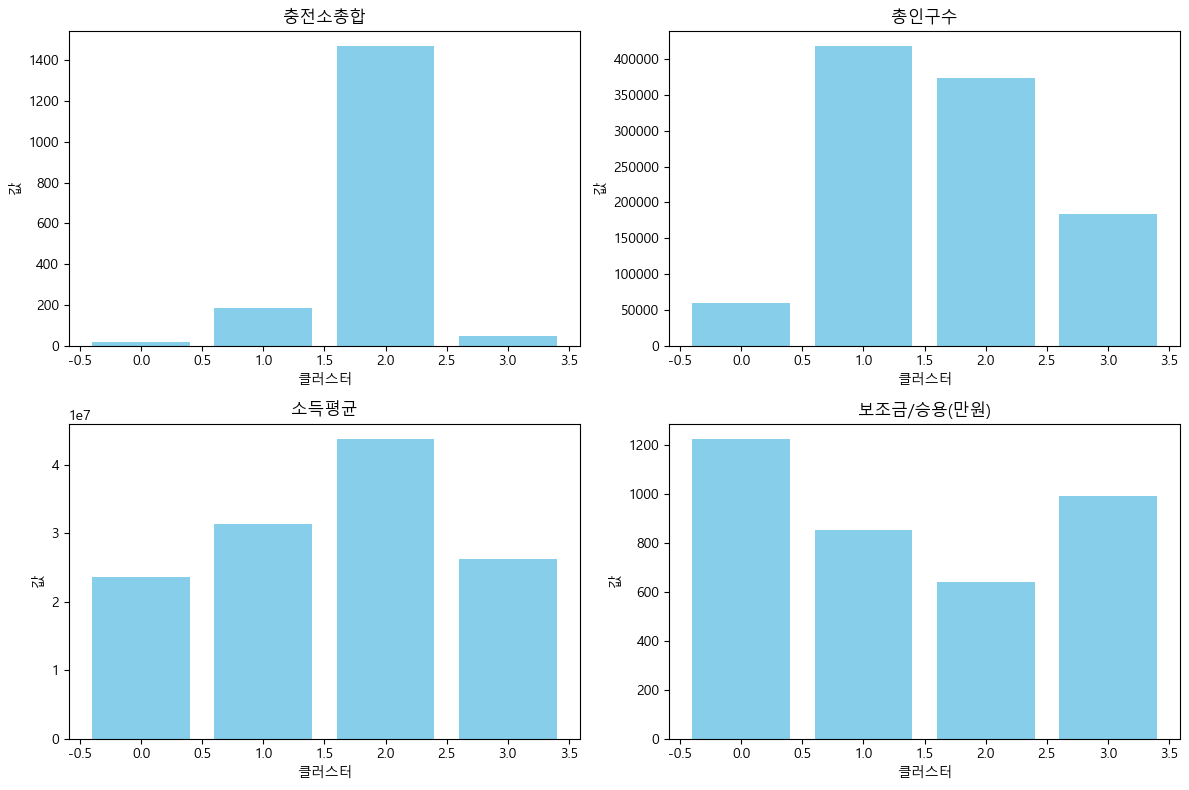

In [14]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
cols = cluster_summary.columns

for i in range(4):
    ax = axs[i // 2][i % 2]
    ax.bar(cluster_summary.index, cluster_summary[cols[i]], color='skyblue')
    ax.set_title(f'{cols[i]}')
    ax.set_xlabel('클러스터')
    ax.set_ylabel('값')

plt.tight_layout()
plt.show()

In [15]:
cluster_df = merged[['시군구', '클러스터']].copy()
cluster_df['시군구'] = cluster_df['시군구'].str.strip()

cdf = pd.read_csv("../data/raw/avg_latlng_by_region.csv")
cdf['행정구역_수정'] = cdf['행정구역_수정'].str.strip()

merged_map_df = pd.merge(cluster_df, cdf, left_on="시군구", right_on="행정구역_수정", how="inner")


colors = ['red', 'blue', 'green', 'orange', 'purple', 'gold']  

m = folium.Map(location=[36.5, 127.8], zoom_start=7)

for i in range(len(merged_map_df)):
    row = merged_map_df.iloc[i]
    folium.CircleMarker(
        [row['위도'], row['경도']],
        radius=6,
        color=colors,
        fill=True,
        fill_color=colors[row['클러스터']],
        fill_opacity=0.85,
        popup=row['시군구']
    ).add_to(m)

m.save("../output/clustering.html")